In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install -q keras

In [ ]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
import keras

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
#print(os.listdir("../drive"))
print(os.listdir("/content/drive/MyDrive/AutismDataset"))

['test', 'test2', 'consolidated', 'train', 'valid']


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from tensorflow.keras.applications import VGG19
from keras.models import Model
from keras import optimizers , layers, applications

In [ ]:
filenames = os.listdir("/content/drive/My Drive/AutismDataset/train")
categories = []
for filename in filenames:
    #print("opudj")
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(train_df)

                   filename category
0     Non_Autistic.1059.jpg        0
1      Non_Autistic.204.jpg        0
2      Non_Autistic.138.jpg        0
3     Non_Autistic.1268.jpg        0
4          Autistic.961.jpg        1
...                     ...      ...
2535       Autistic.286.jpg        1
2536       Autistic.377.jpg        1
2537       Autistic.291.jpg        1
2538       Autistic.457.jpg        1
2539        Autistic.33.jpg        1

[2540 rows x 2 columns]


In [ ]:
train_df.head()

,filename,category
0,Non_Autistic.1059.jpg,0
1,Non_Autistic.204.jpg,0
2,Non_Autistic.138.jpg,0
3,Non_Autistic.1268.jpg,0
4,Autistic.961.jpg,1


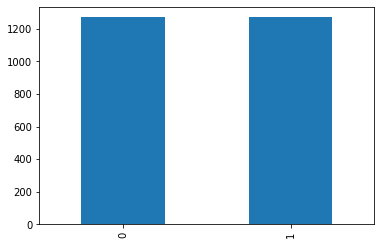

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
test_filenames = os.listdir("/content/drive/My Drive/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
print(test_df)

                 filename
0        Autistic.139.jpg
1          Autistic.4.jpg
2         Autistic.43.jpg
3         Autistic.82.jpg
4         Autistic.89.jpg
..                    ...
295   Non_Autistic.59.jpg
296  Non_Autistic.106.jpg
297   Non_Autistic.14.jpg
298       Autistic.99.jpg
299       Autistic.96.jpg

[300 rows x 1 columns]


In [ ]:
test_df.head()

,filename
0,Autistic.139.jpg
1,Autistic.4.jpg
2,Autistic.43.jpg
3,Autistic.82.jpg
4,Autistic.89.jpg


In [ ]:
from PIL import Image
import random

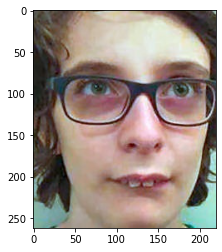

In [ ]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/AutismDataset/train/"+sample)
plt.imshow(image)

In [ ]:
image_size = 230
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs =  100
batch_size = 12
pre_trained_model = VGG19(input_shape=input_shape, include_top=False, weights="imagenet")
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
x = GlobalMaxPooling2D()(last_output)

In [ ]:
x = Dense(512, activation='relu')(x)

In [ ]:
x = Dropout(0.5)(x)

In [ ]:
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
from tensorflow import keras
model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 230, 230, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 230, 230, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 230, 230, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 115, 115, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 115, 115, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 115, 115, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 57, 57, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)


Found 2286 validated image filenames belonging to 2 classes.


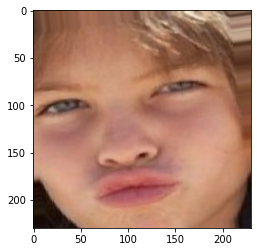

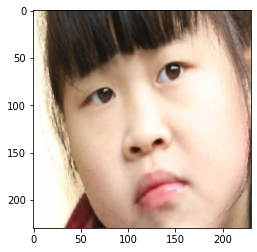

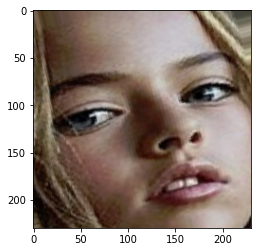

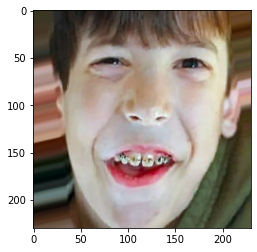

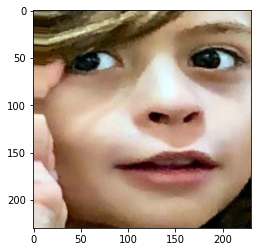

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
x_batch, y_batch = next(train_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

Found 254 validated image filenames belonging to 2 classes.
{'0': 0, '1': 1}


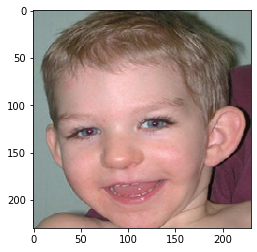

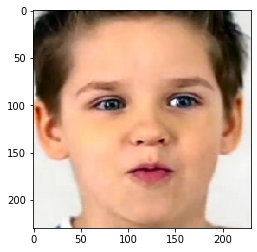

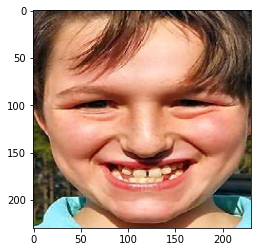

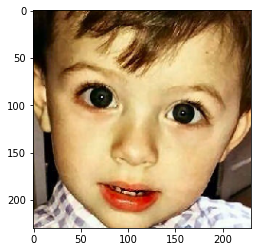

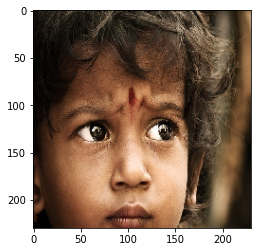

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)
print(validation_generator.class_indices)
x_batch, y_batch = next(validation_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
190/190 [==============================] - 91s 295ms/step - loss: 0.6936 - accuracy: 0.5686 - val_loss: 0.6888 - val_accuracy: 0.5119
Epoch 2/100
190/190 [==============================] - 50s 264ms/step - loss: 0.6781 - accuracy: 0.5871 - val_loss: 0.7158 - val_accuracy: 0.6071
Epoch 3/100
190/190 [==============================] - 51s 269ms/step - loss: 0.5977 - accuracy: 0.6979 - val_loss: 0.5530 - val_accuracy: 0.7579
Epoch 4/100
190/190 [==============================] - 51s 265ms/step - loss: 0.5402 - accuracy: 0.7318 - val_loss: 0.4618 - val_accuracy: 0.7659
Epoch 5/100
190/190 [==============================] - 53s 275ms/step - loss: 0.4999 - accuracy: 0.7564 - val_loss: 0.4890 - val_accuracy: 0.7778
Epoch 6/100
190/190 [==============================] - 51s 268ms/step - loss: 0.4808 - accuracy: 0.7652 - val_loss: 0.4333 - val_accuracy: 0.8056
Epoch 7/100
190/190 [==============================] - 52s 273ms/step - loss: 0.4776 - accuracy: 0.7863 - val_loss: 0.4207 -

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test: accuracy = 0.821429  ;  loss = 0.754795 


In [ ]:
test_filenames = os.listdir("/content/drive/My Drive/AutismDataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

Found 300 validated image filenames.


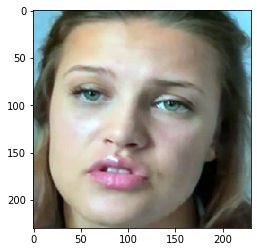

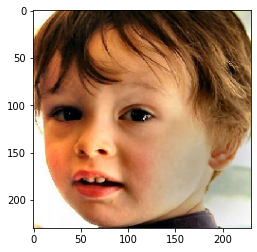

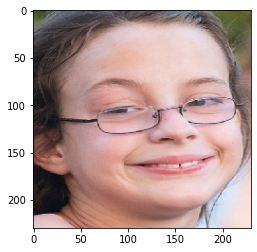

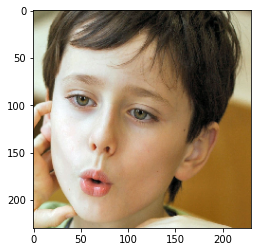

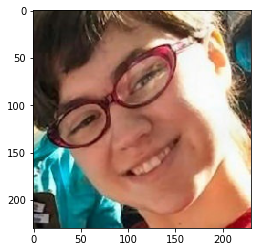

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/My Drive/AutismDataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)
x_batch= next(test_generator)
for i in range (0,5):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [ ]:
threshold = 0.5
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
threshold = 0.5
test_df['category'] = np.where(predict > threshold, 1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


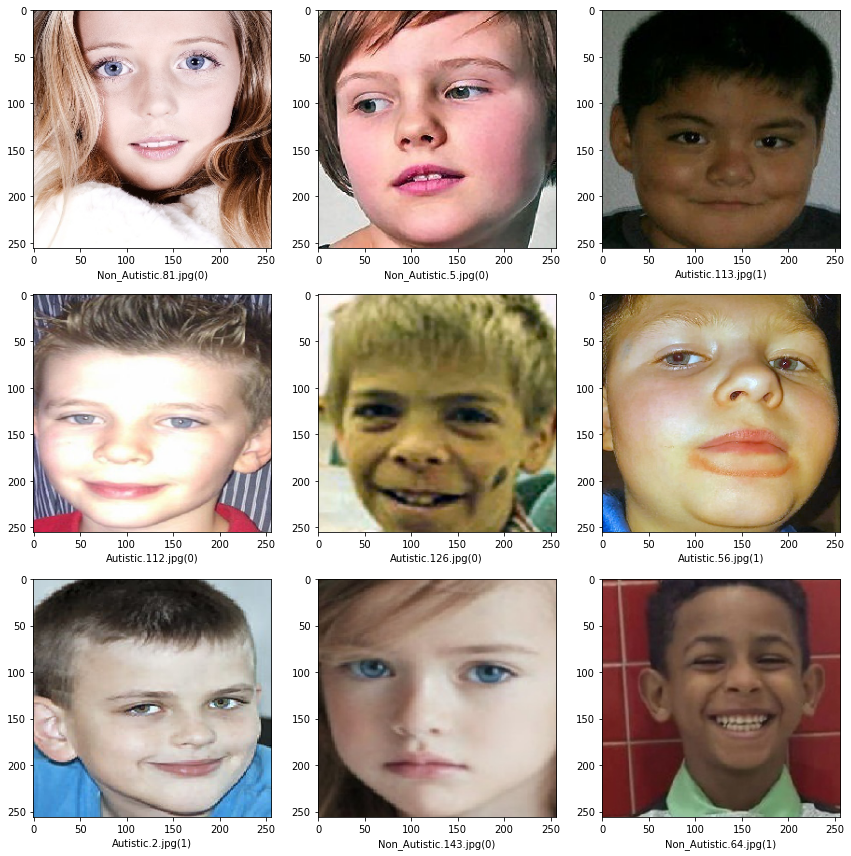

In [ ]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/AutismDataset/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:

submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


In [ ]:
import pandas as pd 
pd.read_csv('submission_13010030.csv')

,id,label
0,Autistic,1
1,Autistic,1
2,Autistic,1
3,Autistic,1
4,Autistic,1
...,...,...
295,Non_Autistic,0
296,Non_Autistic,0
297,Non_Autistic,1
298,Autistic,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Predicted data)')

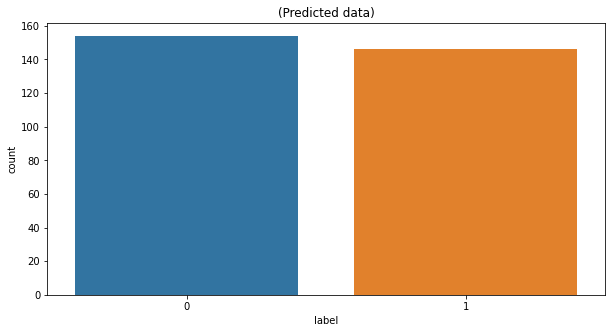

In [ ]:

plt.figure(figsize=(10,5))
sns.countplot(submission_df['label'])
plt.title("(Predicted data)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data)')

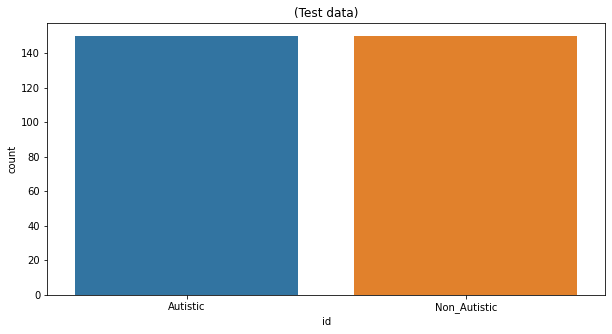

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_13010030.csv', index=False)


plt.figure(figsize=(10,5))
sns.countplot(submission_df['id'])
plt.title("(Test data)")

In [ ]:
import csv



my_reader = csv.reader(open('submission_13010030.csv'))
predicted_autistic = 0
for record in my_reader:
    if record[1] == '1':
        predicted_autistic += 1
print("predicted Autistic : " ,predicted_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
predicted_non_autistic = 0
for record1 in my_reader:
    if record1[1] == '0':
        predicted_non_autistic += 1
print("predicted Non Autistic : " ,predicted_non_autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
autistic = 0
for record1 in my_reader:
    if record1[0] == 'Autistic':
        autistic += 1
print("Actual Autistic : " ,autistic)

my_reader = csv.reader(open('submission_13010030.csv'))
non_autistic = 0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic':
        non_autistic += 1
print("Actual Non Autistic : " ,non_autistic)



predicted Autistic :  146
predicted Non Autistic :  154
Actual Autistic :  150
Actual Non Autistic :  150


In [ ]:
print("Actual Non Autistic percentage in total test data: " ,(non_autistic/300)*100,"%")
print("Predicted Non Autistic percentage in total test data: " ,(predicted_non_autistic/300)*100,"%")
print("Actual Autistic percentage in total test data: " ,(autistic/300)*100,"%")

print("Predicted Autistic percentage in total test data: " ,(predicted_autistic/300)*100,"%")


Actual Non Autistic percentage in total test data:  50.0 %
Predicted Non Autistic percentage in total test data:  51.33333333333333 %
Actual Autistic percentage in total test data:  50.0 %
Predicted Autistic percentage in total test data:  48.66666666666667 %


In [ ]:
my_reader = csv.reader(open('submission_13010030.csv'))
true_pos = 0 #autistic,1
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='1':
        true_pos += 1
print("True positive : " ,true_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
true_neg = 0 #non_autistic,0
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='0':
        true_neg += 1
print("True Negative : " ,true_neg)

my_reader = csv.reader(open('submission_13010030.csv'))
false_pos = 0 #autistic,0
for record1 in my_reader:
    if record1[0] == 'Autistic' and record1[1]=='0':
       false_pos += 1
print("false Positive : " ,false_pos)

my_reader = csv.reader(open('submission_13010030.csv'))
false_neg = 0 #non_autistic,1
for record1 in my_reader:
    if record1[0] == 'Non_Autistic' and record1[1]=='1':
       false_neg += 1
print("false Negative : " ,false_neg)

True positive :  130
True Negative :  134
false Positive :  20
false Negative :  16


In [ ]:
accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos + false_neg)
print("Accuracy is: ",accuracy*100,"%")

Accuracy is:  88.0 %


In [ ]:
precision = true_pos / ( true_pos + false_pos)
print("Precision is: ",precision*100,"%")

Precision is:  86.66666666666667 %


In [ ]:
sensitivity = true_pos / (true_pos + false_neg)
print("Sensitivity is: ",sensitivity*100,"%")

Sensitivity is:  89.04109589041096 %


In [ ]:
Specificity =true_neg / (true_neg + false_pos)
print("Specificity is: ",Specificity*100,"%")

Specificity is:  87.01298701298701 %


In [ ]:
test_filenames2 = os.listdir("/content/drive/My Drive/AutismDataset/test2")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
print(test_df2)


                  filename
0      real-autistic.2.jpg
1  real_non_autistic.3.jpg
2      real_autistic.1.jpg
3  real_non_autistic.4.jpg


Found 4 validated image filenames.


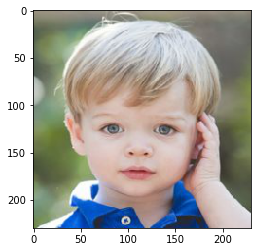

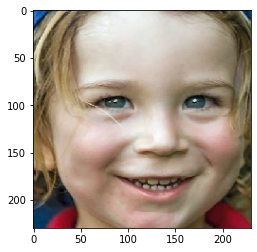

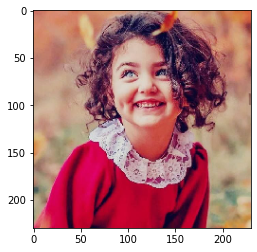

In [ ]:
test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen.flow_from_dataframe(
    test_df2, 
    "/content/drive/My Drive/AutismDataset/test2/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)
x_batch2= next(test_generator2)
for i in range (0,3):
    image = x_batch2[i]
    plt.imshow(image)
    plt.show()

In [ ]:
threshold = 0.5
predict2 = model.predict_generator(test_generator2, steps=np.ceil(nb_samples/batch_size))
test_df2['category'] = np.where(predict2 > threshold, 1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


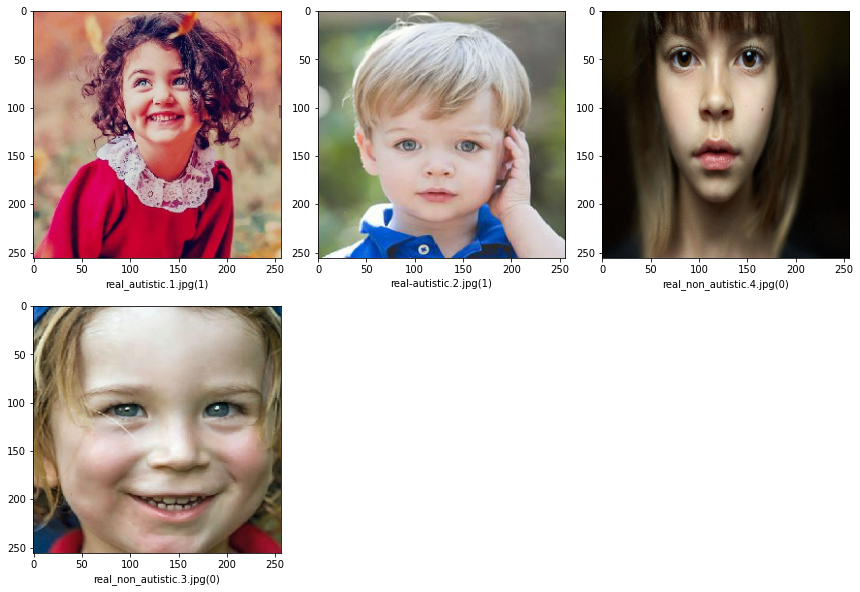

In [ ]:
sample_test2 = test_df2.sample(n=4).reset_index()
sample_test2.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test2.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/AutismDataset/test2/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

In [ ]:
submission_df = test_df2.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission_130100301.csv', index=False)

In [ ]:
import pandas as pd 
pd.read_csv('submission_130100301.csv')

,id,label
0,real-autistic,1
1,real_non_autistic,0
2,real_autistic,1
3,real_non_autistic,0
